<a href="https://www.kaggle.com/code/umutky/spotify-ml?scriptVersionId=142566529" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/-spotify-tracks-dataset/dataset.csv


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings

# Uyarıları yok saymak için uyarı filtresini ayarlama
warnings.filterwarnings("ignore")

In [3]:
# load dataset.
spotify = pd.read_csv("/kaggle/input/-spotify-tracks-dataset/dataset.csv", index_col=0)
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
# Explicit False = 0, True = 1
spotify["explicit"] = spotify["explicit"].astype(int)

In [5]:
spotify.shape

(114000, 20)

In [6]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  int64  
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

In [7]:
spotify.describe().style.background_gradient(cmap="Greens")

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,228029.153114,0.085500,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,107297.712645,0.279626,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,174066.000000,0.000000,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,212906.000000,0.000000,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,261506.000000,0.000000,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5237295.000000,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [8]:
spotify.describe(include=["bool", "object"])

,track_id,artists,album_name,track_name,track_genre
count,114000,113999,113999,113999,114000
unique,89741,31437,46589,73608,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,acoustic
freq,9,279,195,151,1000


In [9]:
# NA value control.
spotify.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [10]:
spotify.dropna(inplace=True)

In [11]:
# NA value control after using dropna()
spotify.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

# Examine Numerical Data

---------------------------------POPULARITY-------------------------------


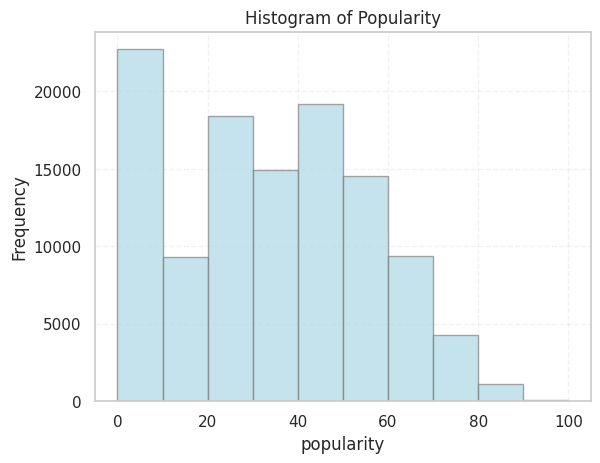

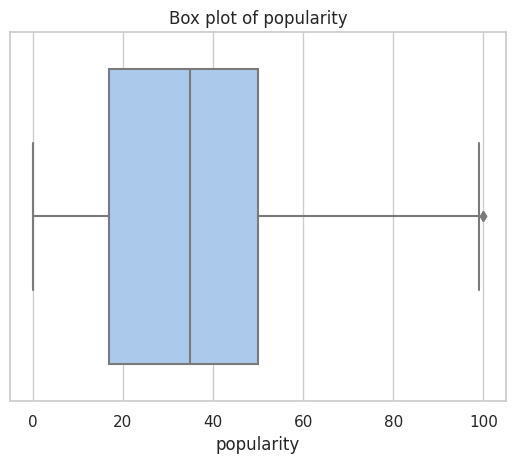

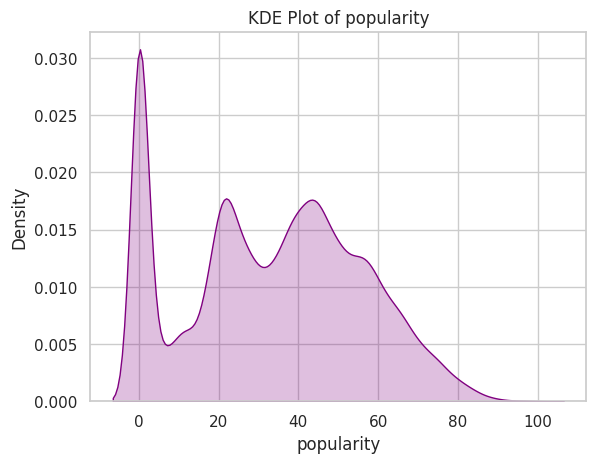

---------------------------------DURATION_MS-------------------------------


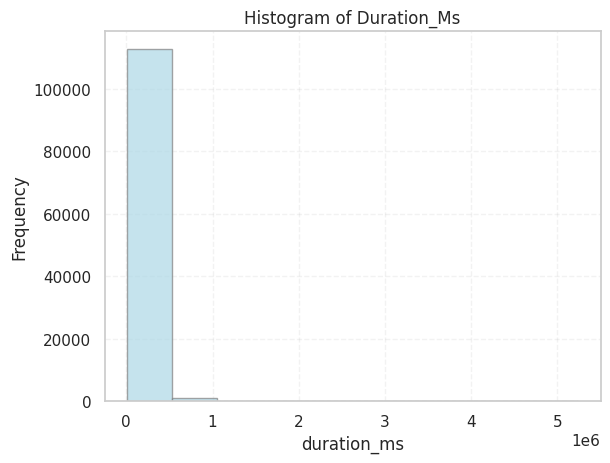

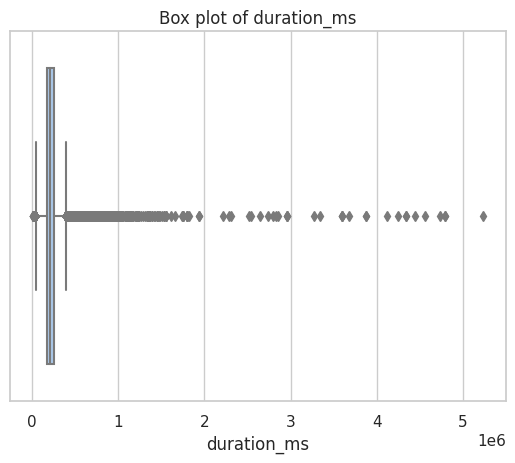

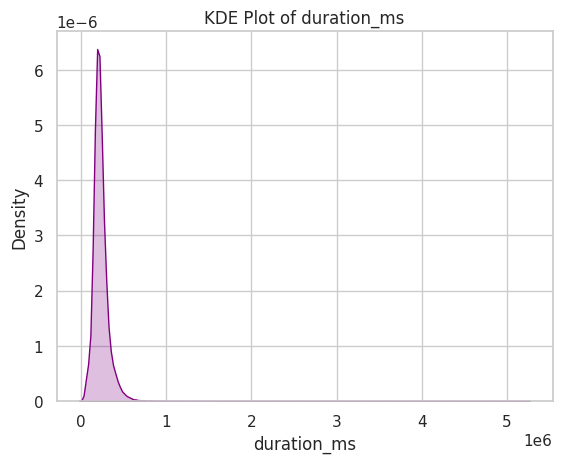

---------------------------------EXPLICIT-------------------------------


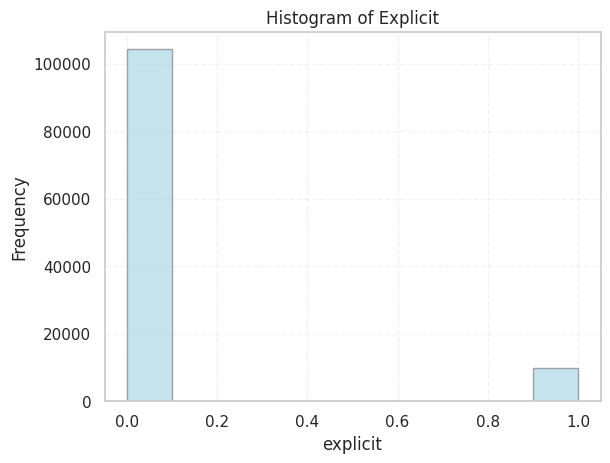

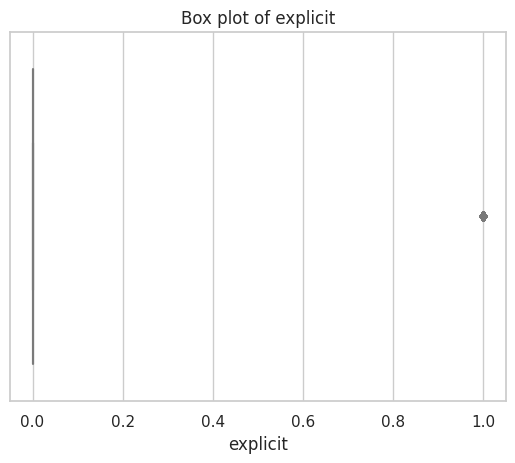

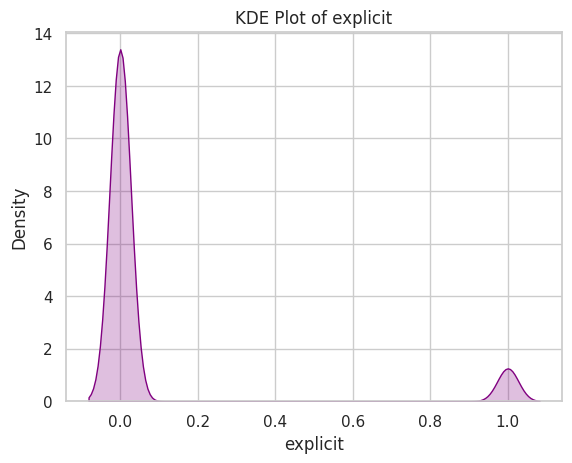

---------------------------------DANCEABILITY-------------------------------


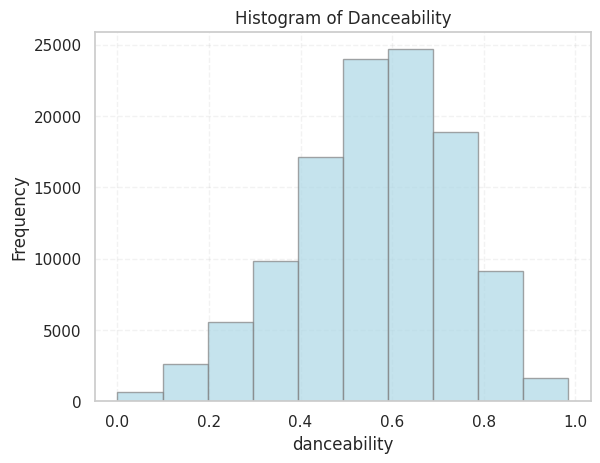

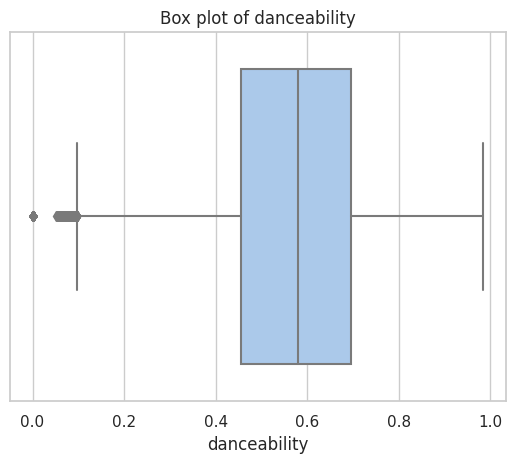

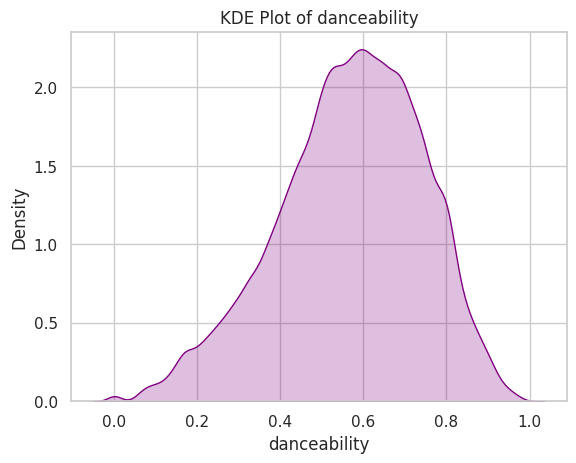

---------------------------------ENERGY-------------------------------


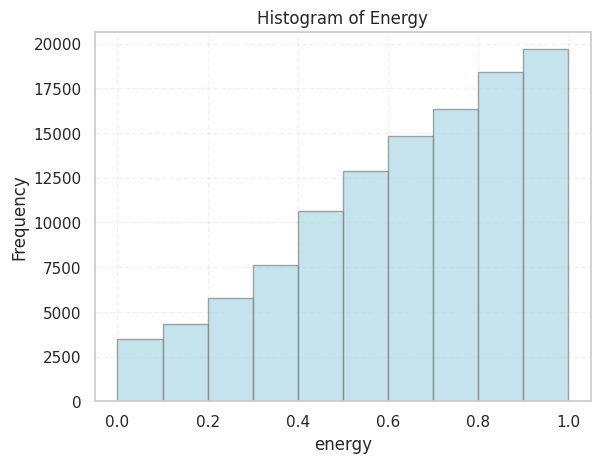

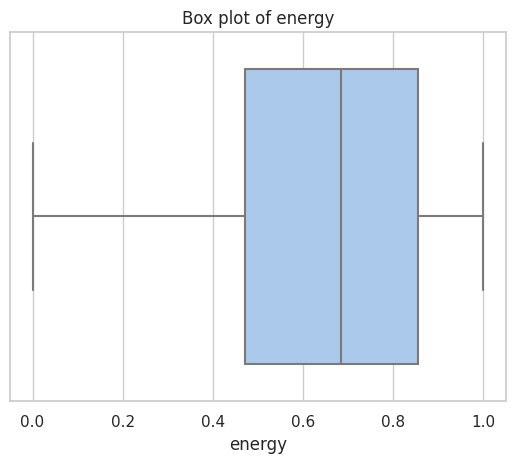

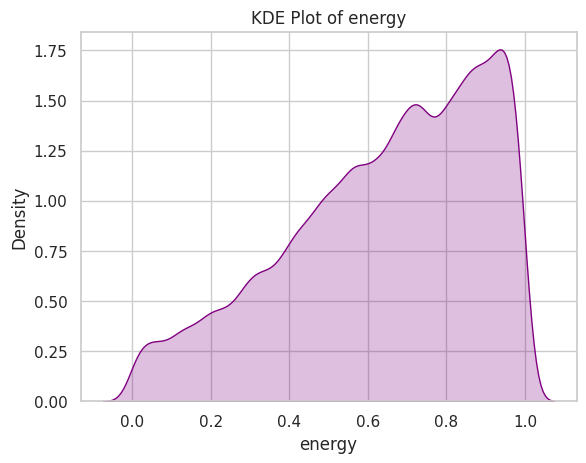

---------------------------------KEY-------------------------------


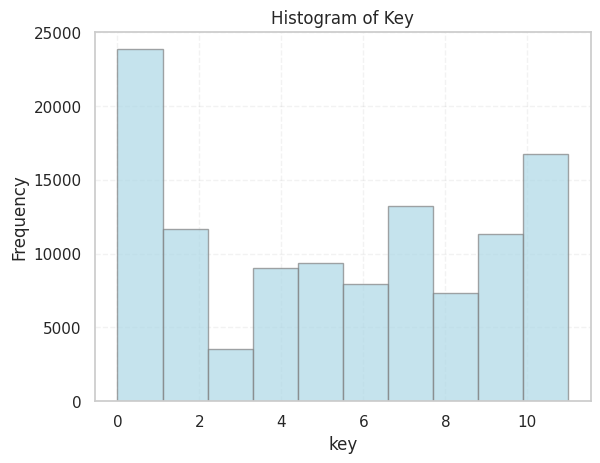

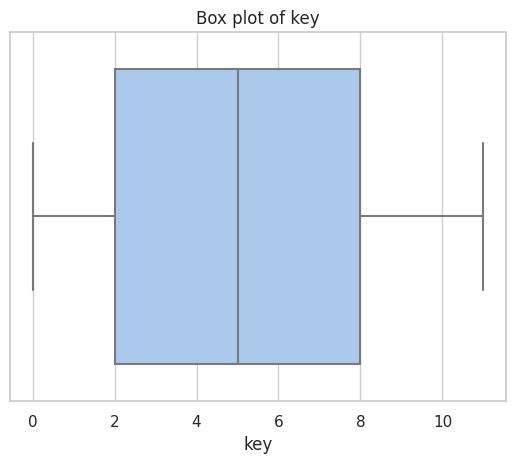

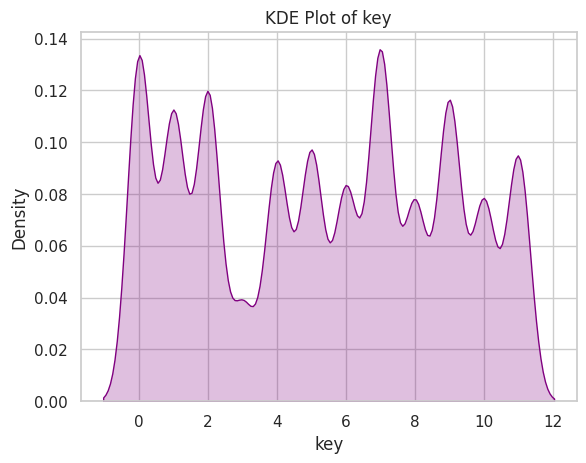

---------------------------------LOUDNESS-------------------------------


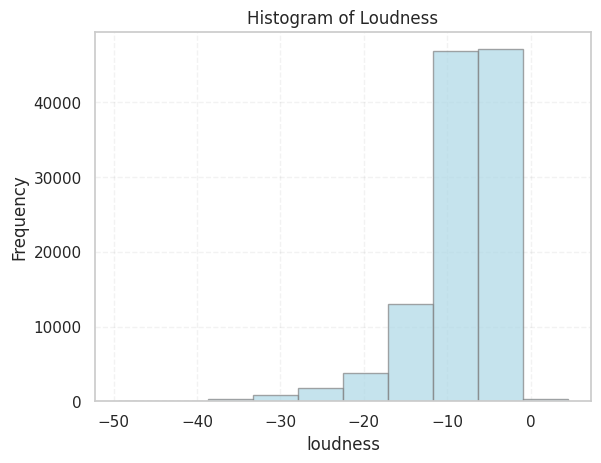

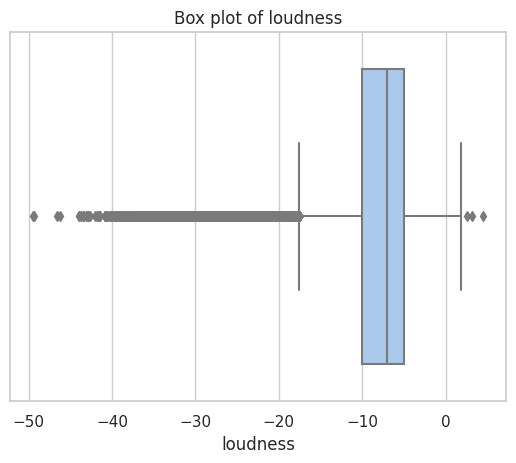

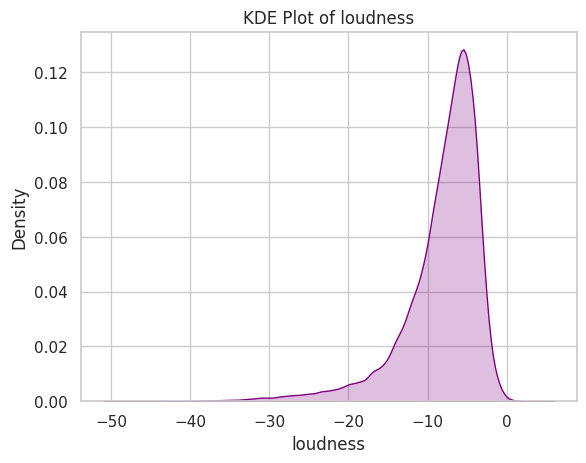

---------------------------------MODE-------------------------------


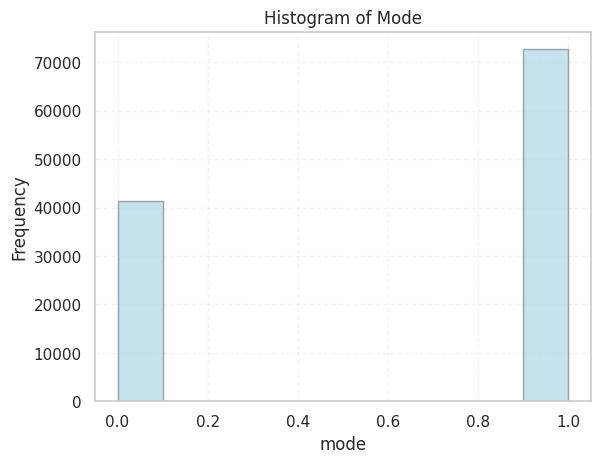

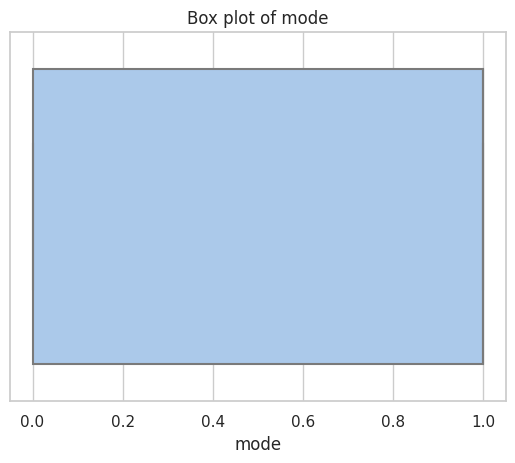

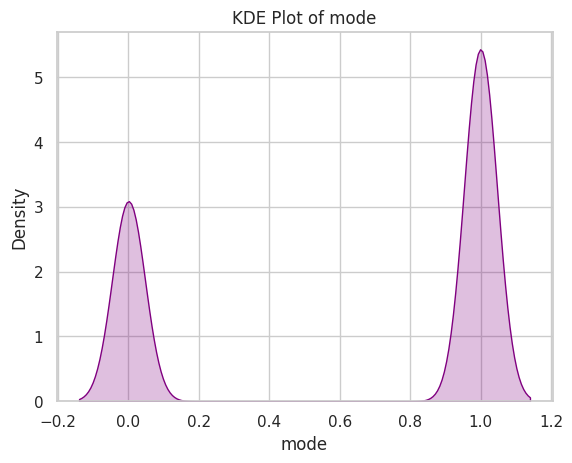

---------------------------------SPEECHINESS-------------------------------


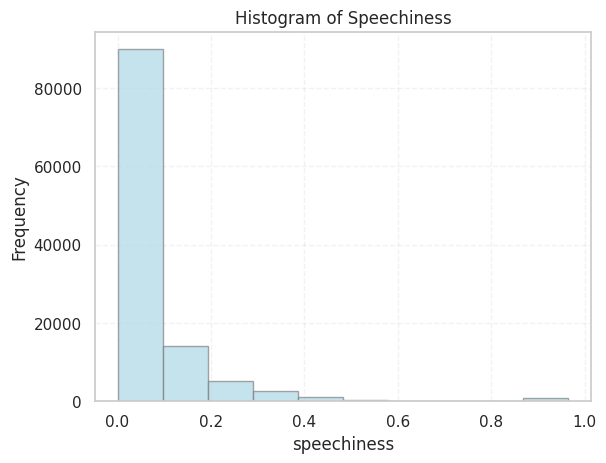

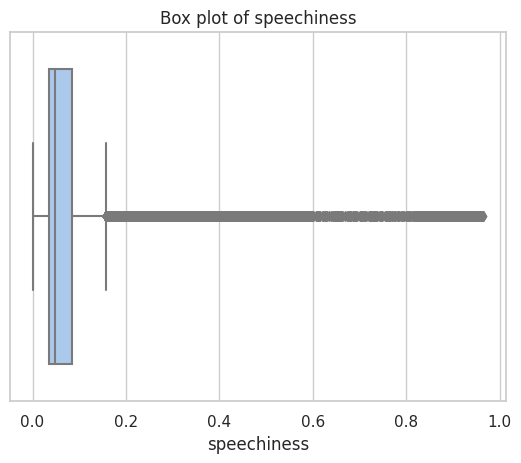

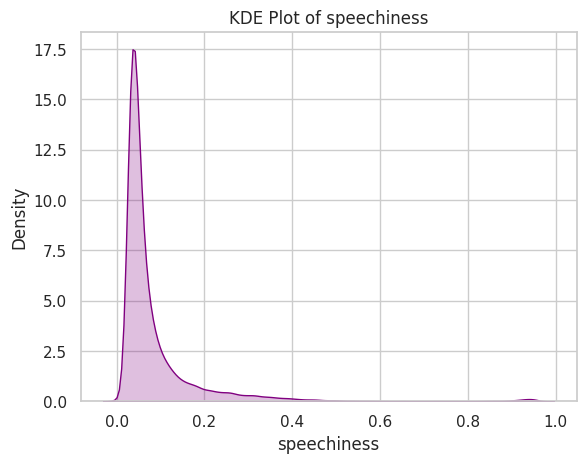

---------------------------------ACOUSTICNESS-------------------------------


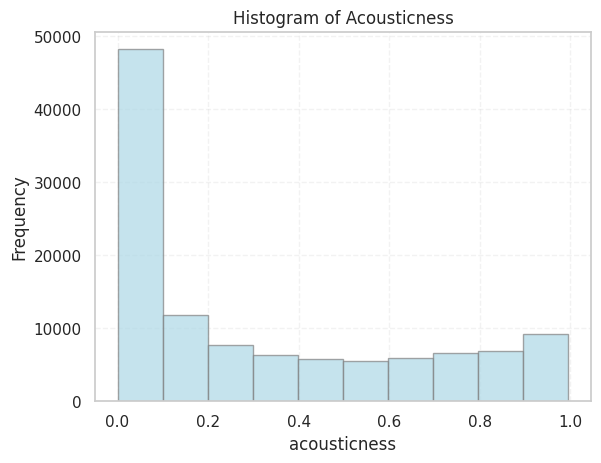

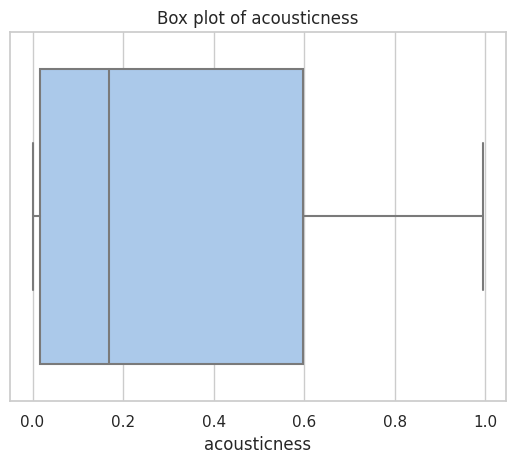

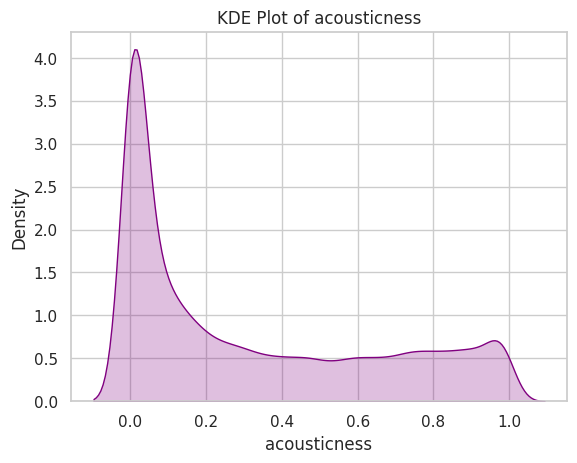

---------------------------------INSTRUMENTALNESS-------------------------------


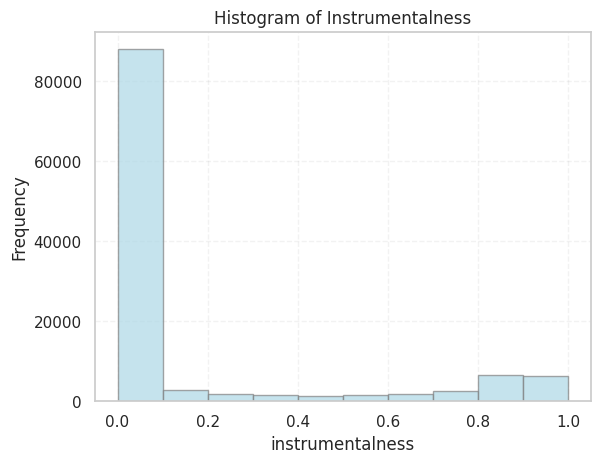

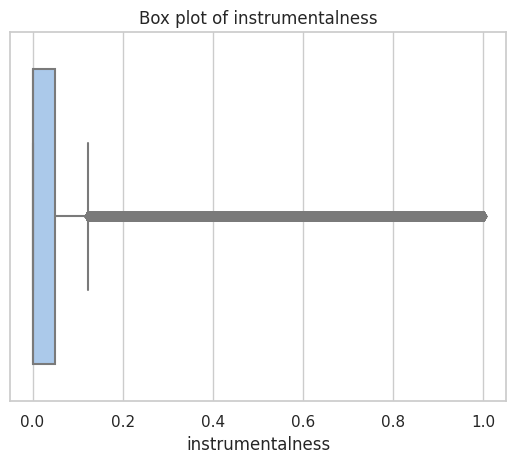

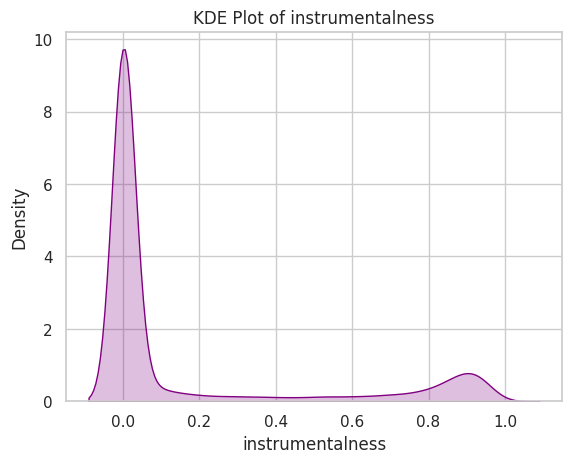

---------------------------------LIVENESS-------------------------------


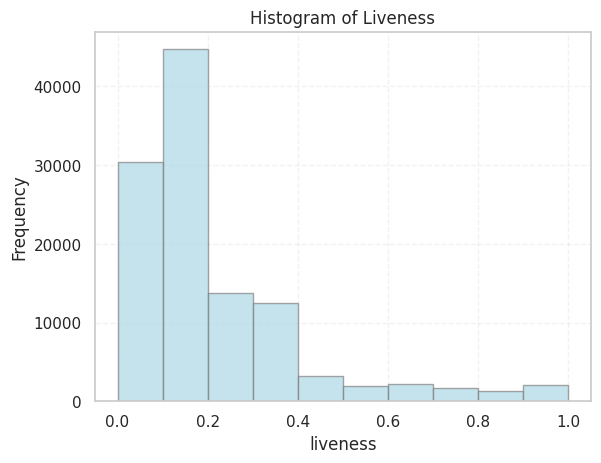

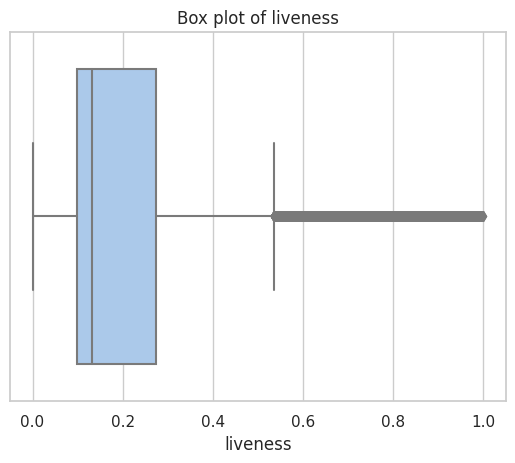

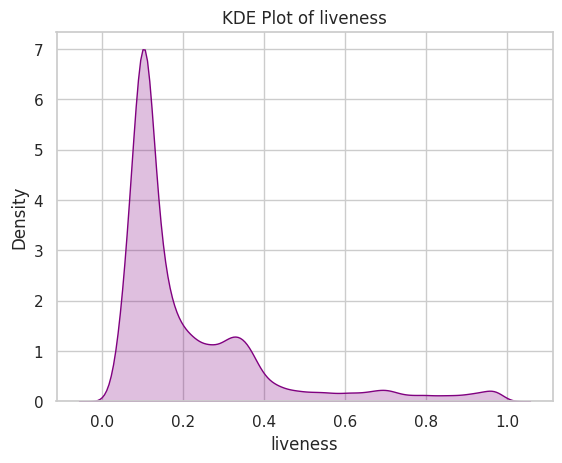

---------------------------------VALENCE-------------------------------


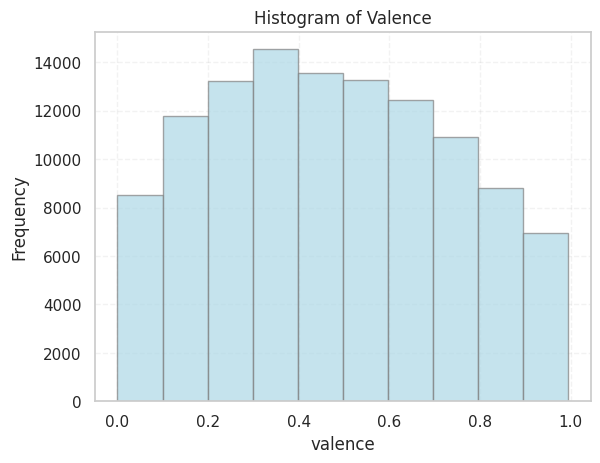

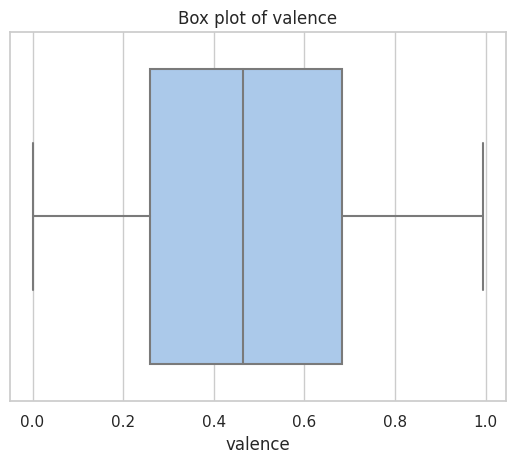

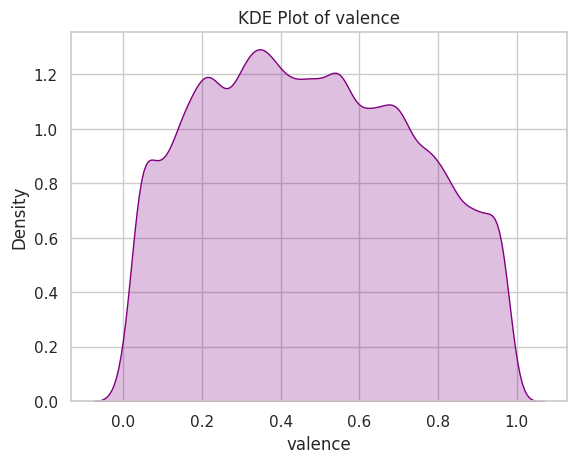

---------------------------------TEMPO-------------------------------


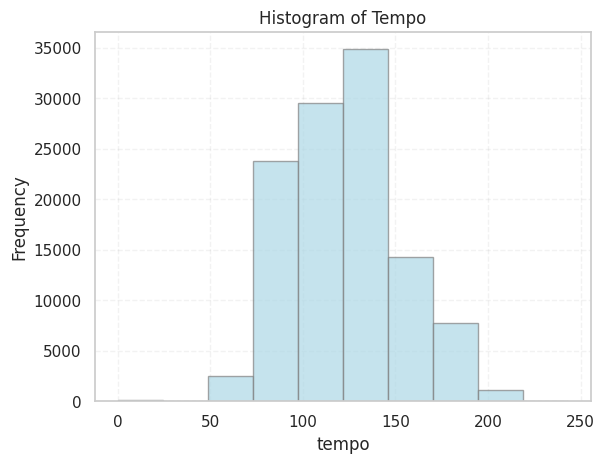

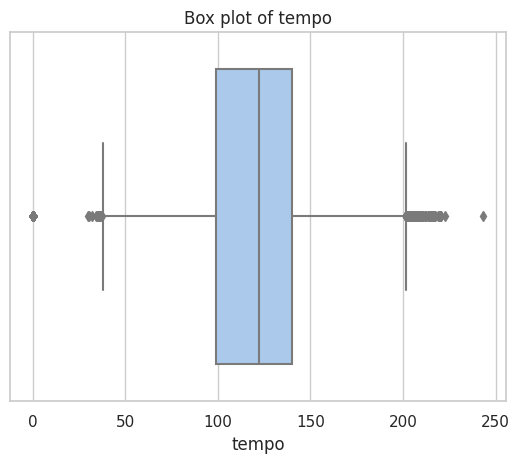

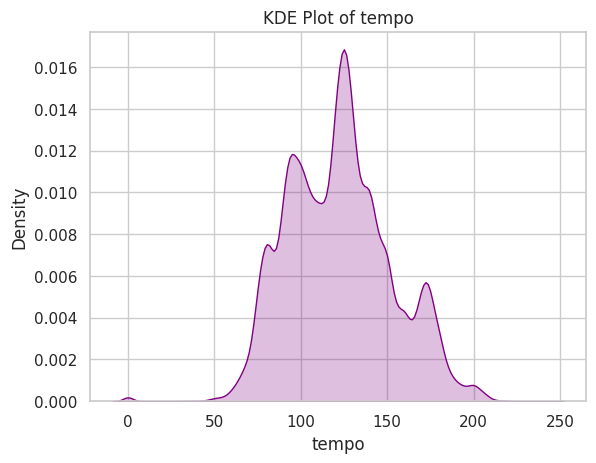

---------------------------------TIME_SIGNATURE-------------------------------


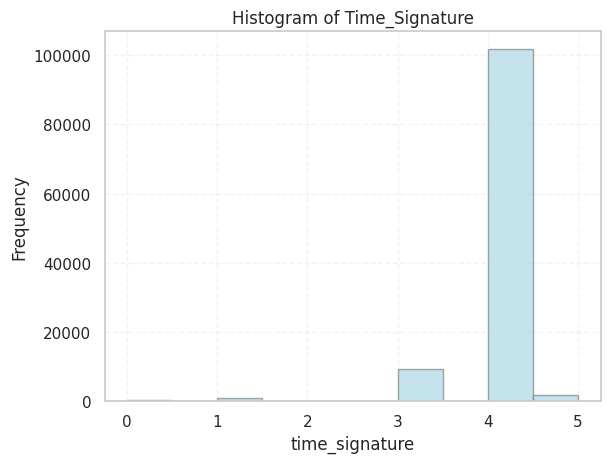

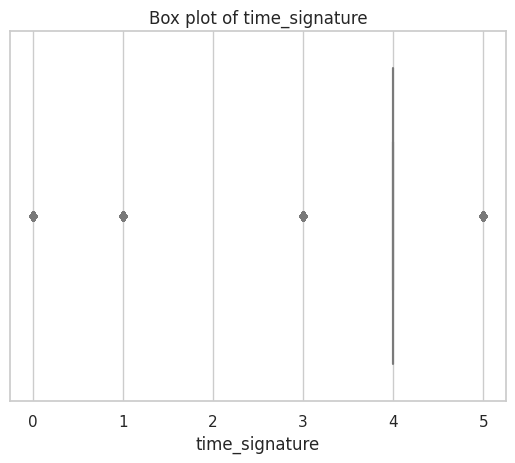

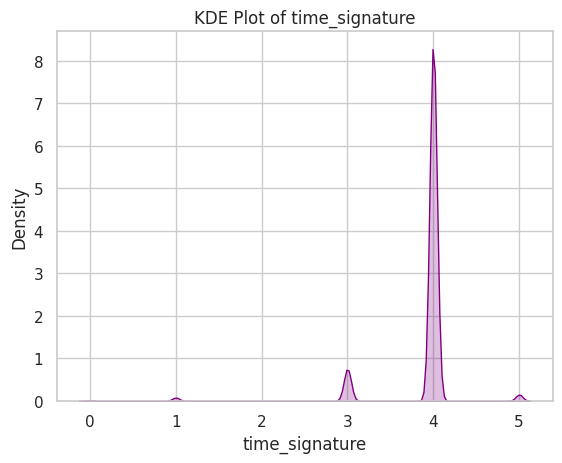

In [12]:
sns.set(style="whitegrid")
for col in spotify.select_dtypes(include=["int", "float"]).columns:
    print(f"---------------------------------{col.upper()}-------------------------------")
    plt.hist(spotify[col], bins=10, color='lightblue', edgecolor='gray', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f"Histogram of {col.title()}")
    plt.grid(True, linestyle='--', alpha=0.1, color='gray')
    plt.show() 
    
    sns.boxplot(x=spotify[col], color='lightblue', palette='pastel')
    plt.xlabel(col)
    plt.title(f"Box plot of {col}")
    plt.show()
    
    sns.kdeplot(spotify[col], fill=True, color='purple')
    plt.xlabel(col)
    plt.title(f'KDE Plot of {col}')
    plt.show()

## Correlation Analysis


Korelasyon Matrix'ini incelediğimizde...

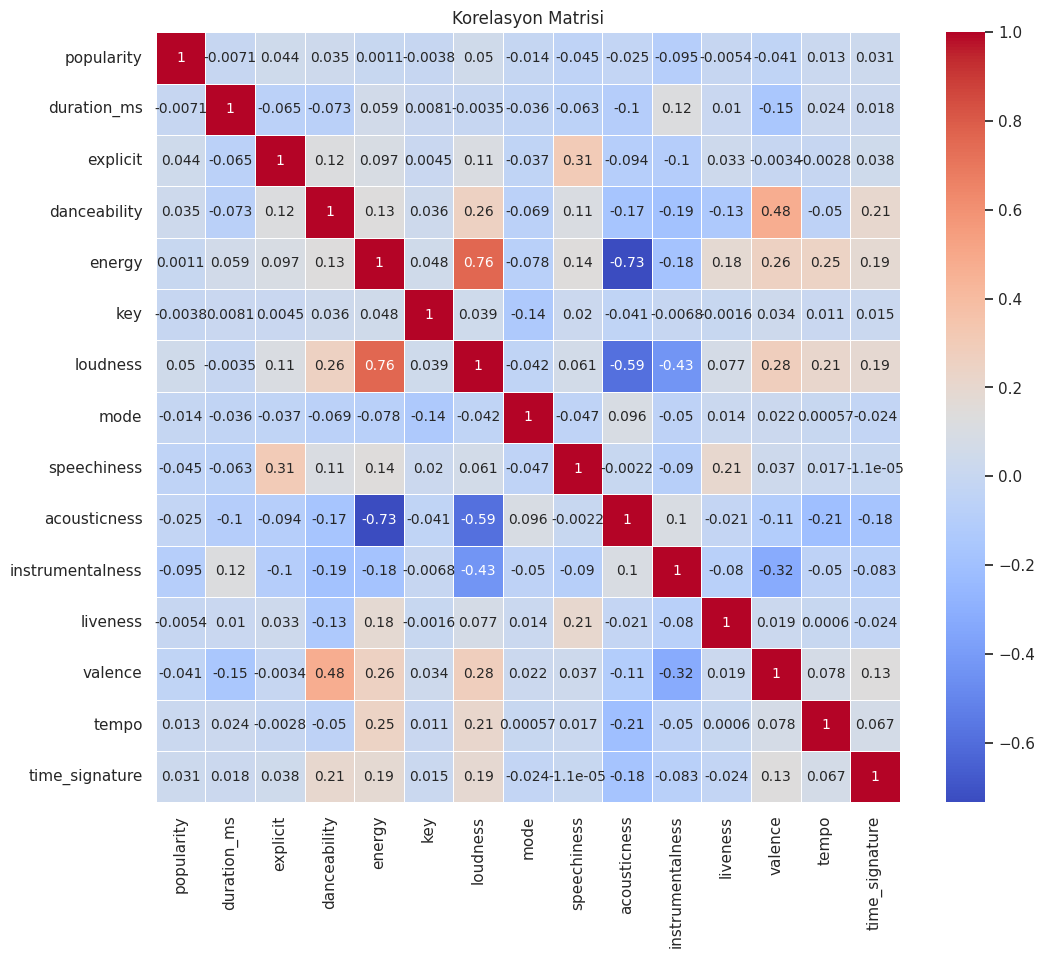

In [13]:
# Korelasyon matrisini hesaplayın
corr_matrix = spotify.select_dtypes(include=["int", "float"]).corr()

# Isı haritası (heatmap) çizin
plt.figure(figsize=(12, 10))  # Daha büyük bir alan ayarlayın
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})
plt.title('Korelasyon Matrisi')
plt.show()

                  Correlation Matrix of Danceability
popularity                                  0.035444
duration_ms                                -0.073435
explicit                                    0.122506
danceability                                1.000000
energy                                      0.134325
key                                         0.036470
loudness                                    0.259076
mode                                       -0.069224
speechiness                                 0.108625
acousticness                               -0.171531
instrumentalness                           -0.185608
liveness                                   -0.131620
valence                                     0.477347
tempo                                      -0.050448
time_signature                              0.207219


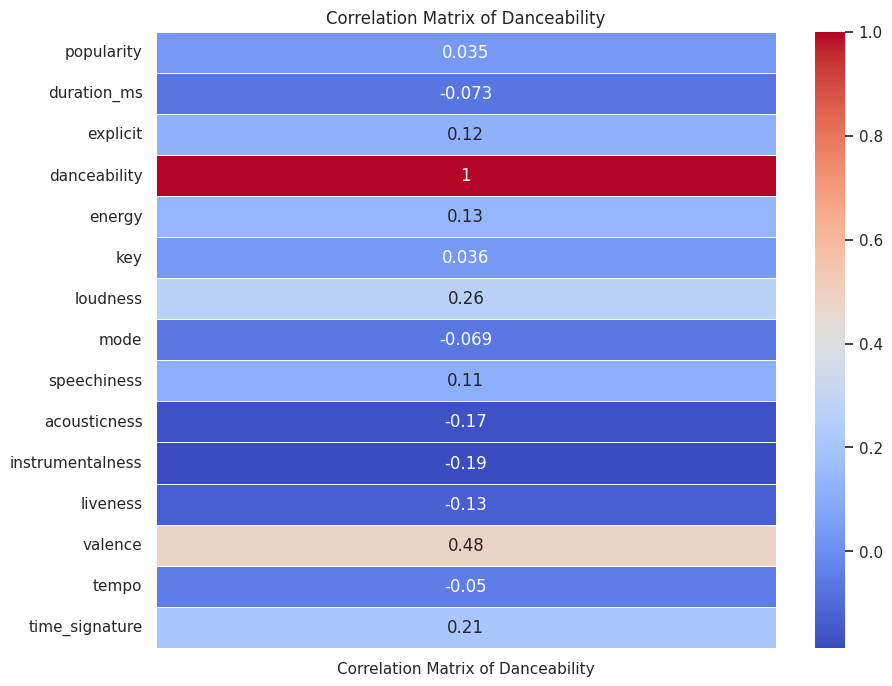

In [14]:
danceability_corr_matrix = spotify.select_dtypes(include=["int", "float"]).corrwith(spotify['danceability']).to_frame('Correlation Matrix of Danceability')
print(danceability_corr_matrix)

# Korelasyon matrisini çizin
plt.figure(figsize=(10, 8))
sns.heatmap(danceability_corr_matrix, cmap='coolwarm', annot=True, linewidths=0.5)
plt.title('Correlation Matrix of Danceability')
plt.show()

# Model

In [15]:
data = spotify.copy()
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [16]:
data = data.drop(labels=["track_id", "artists", "album_name", "track_name", "track_genre"], axis=1)

In [17]:
data.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [18]:
# Test-Train Split

X = data.drop("danceability", axis=1)
y = data["danceability"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=21)

print("Shape of X_train",X_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (79799, 14)
Shape of X_test (34200, 14)
Shape of y_train (79799,)
Shape of y_test (34200,)


## Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
# Modeli seç ve eğit
model = LinearRegression()
model.fit(X_train, y_train)

# Modeli test seti üzerinde değerlendir
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.01926552072601751
Mean Absolute Error (MAE): 0.11100501141837892
R-squared (R2): 0.3549134661805503


## CART

In [20]:
from sklearn.tree import DecisionTreeRegressor

# Karar Ağaçları Regresyon modelini oluştur
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

# Modeli değerlendir
y_pred_dt = model_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"Mean Absolute Error (MAE): {mae_dt}")
print(f"R-squared (R1): {r2_dt}")

Mean Squared Error (MSE): 0.016377488358479533
Mean Absolute Error (MAE): 0.0796136023391813
R-squared (R1): 0.45161631766472987


## Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Rastgele Orman Regresyon modelini oluştur
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Modeli değerlendir
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R-squared (R2): {r2_rf}")

Mean Squared Error (MSE): 0.00815974588446582
Mean Absolute Error (MAE): 0.062470970906432784
R-squared (R2): 0.7267791374904782


In [22]:
predict_all = model_rf.predict(X)

In [23]:
dance = pd.DataFrame(model_rf.predict(X))
dance = dance.rename(columns={0: "danceability"})

In [24]:
index = dance.sort_values(by="danceability", ascending=False)[:50].index
playlist = spotify.loc[index]

In [25]:
playlist

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
66587,6iR24LBxndGuew9C5asnBf,Coach Kody;Children's Party;Keelan;Tristan,"BOUNCE HOUSE: Birthday Songs 4 Kids, Pt. 2",HAPPY U Were Born,9,105813,0,0.861,0.429,4,-7.956,1,0.0748,0.43900,0.000000,0.1820,0.6890,122.026,4,kids
66890,0FSCGOyavPRvojhp178KUu,Cupid,The Walmart Shuffle,The Walmart Shuffle,9,198765,0,0.783,0.351,8,-15.222,1,0.1190,0.07050,0.000000,0.0677,0.8180,75.996,4,kids
66847,2EN8TrBJlMwFSP0C9ZqECu,The Party Cats,Kids Dance Party 2,Funkytown - Kids Dance Party 2 Album Version,8,257399,0,0.846,0.698,0,-9.239,1,0.0429,0.01370,0.112000,0.0734,0.4870,122.413,4,kids
53697,1aPqexHVW20OTamBHdWWVL,Timeflies,Just For Fun (Deluxe),Undress Rehearsal,60,214786,0,0.953,0.652,11,-4.159,0,0.0849,0.00456,0.000000,0.0287,0.7300,122.997,4,house
57682,1aPqexHVW20OTamBHdWWVL,Timeflies,Just For Fun (Deluxe),Undress Rehearsal,60,214786,0,0.953,0.652,11,-4.159,0,0.0849,0.00456,0.000000,0.0287,0.7300,122.997,4,indie
56334,1aPqexHVW20OTamBHdWWVL,Timeflies,Just For Fun (Deluxe),Undress Rehearsal,60,214786,0,0.953,0.652,11,-4.159,0,0.0849,0.00456,0.000000,0.0287,0.7300,122.997,4,indie-pop
21057,0k2GOhqsrxDTAbFFSdNJjT,Sean Paul,The Trinity,Temperature,79,218573,0,0.951,0.600,0,-4.675,0,0.0685,0.10600,0.000000,0.0712,0.8220,125.040,4,dancehall
20717,0k2GOhqsrxDTAbFFSdNJjT,Sean Paul,The Trinity,Temperature,79,218573,0,0.951,0.600,0,-4.675,0,0.0685,0.10600,0.000000,0.0712,0.8220,125.040,4,dance
88808,6U2NuJILEOEpW2tVCuqKHb,Daddy Yankee;Natti Natasha;Becky G;Bad Bunny,Dura (Remix),Dura - Remix,68,242160,0,0.772,0.803,1,-3.035,1,0.0468,0.18800,0.000000,0.4340,0.8530,94.981,4,reggae
89716,2GPCE96x9Go6acdDt8ex6p,J Balvin;Dua Lipa;Bad Bunny;Tainy,Future Nostalgia (The Moonlight Edition),Un Día (One Day),64,231815,0,0.572,0.634,6,-10.599,0,0.0617,0.00547,0.000000,0.1290,0.4320,168.136,4,reggaeton
